## https://www.kaggle.com/datasets/sujay1844/used-car-prices/data

#### The provided contains various details and attributes associated with used cars. The target variable, which is the central focus of analysis, is the price of the used cars, and it is measured in lakhs.
### Source
#### The dataset has been sourced from "Cars24."

### Data Type:
#### The data in this dataset is tabular, with rows and columns, where each row represents a specific used car listing, and each column represents a particular attribute or feature of these cars.


| Features | Description | 
| ---- | ---- | 
| Name | Brand and model of the car |
| Location | City in which the car was listed | 
| Year | Year of manufacturing | 
| Kilometers driven | Total kilometers driven in the car by the previous owners (in km) | 
| Fuel type |
| Transmission type |
| Owners | 
| Mileage | Standard mileage offered by the car company in kmpl or km/kg |
| Engine | Displacement volume of the engine in CC. |
| Power | Maximum power of the engine in bhp. |
| Seats | Number of seats in the car. |
| New_Price | Price of a new car of the same model. | 
| Price | Price of the used car in INR Lakhs. |
  



In [88]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

# Data Loading

In [89]:
df = pd.read_csv("/kaggle/input/used-car-prices/train.csv",index_col=0)
print(df.shape)
df.head(3)

(5847, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.0


# Data details

In [90]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5847.000000,5.847000e+03,5809.000000,5847.000000
mean,2013.448435,5.841013e+04,5.286452,9.653742
std,3.194949,9.237971e+04,0.806668,11.275966
min,1998.000000,1.710000e+02,2.000000,0.440000
25%,2012.000000,3.346750e+04,5.000000,3.550000
50%,2014.000000,5.257600e+04,5.000000,5.750000
75%,2016.000000,7.249050e+04,5.000000,10.250000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5847 entries, 1 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5847 non-null   object 
 1   Location           5847 non-null   object 
 2   Year               5847 non-null   int64  
 3   Kilometers_Driven  5847 non-null   int64  
 4   Fuel_Type          5847 non-null   object 
 5   Transmission       5847 non-null   object 
 6   Owner_Type         5847 non-null   object 
 7   Mileage            5845 non-null   object 
 8   Engine             5811 non-null   object 
 9   Power              5811 non-null   object 
 10  Seats              5809 non-null   float64
 11  New_Price          815 non-null    object 
 12  Price              5847 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 639.5+ KB


In [92]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

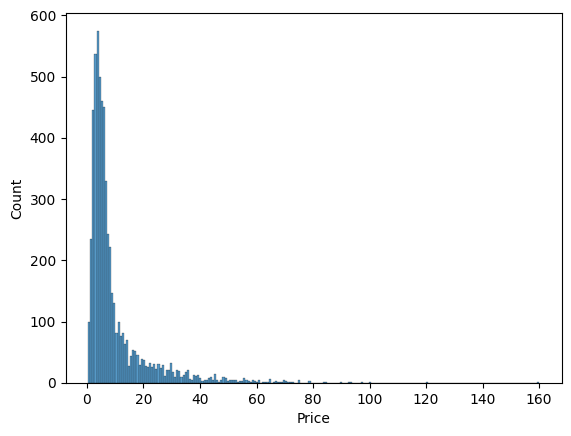

In [93]:
sns.histplot(df["Price"])

## The objective function has a large bias, so use np.log to approximate a normal distribution.

<Axes: xlabel='log_Price', ylabel='Count'>

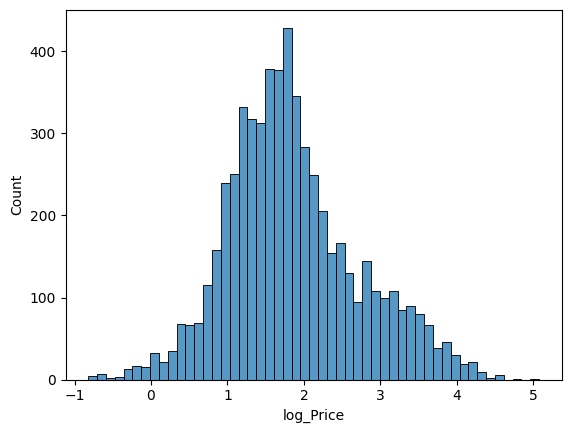

In [94]:
df["log_Price"] = np.log(df["Price"])
sns.histplot(df["log_Price"])

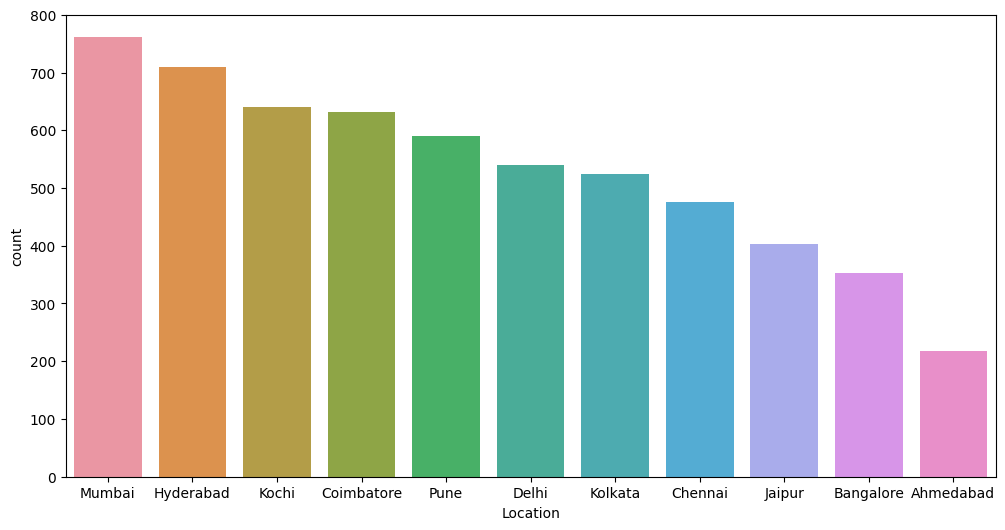

In [95]:
tmp_df = df["Location"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

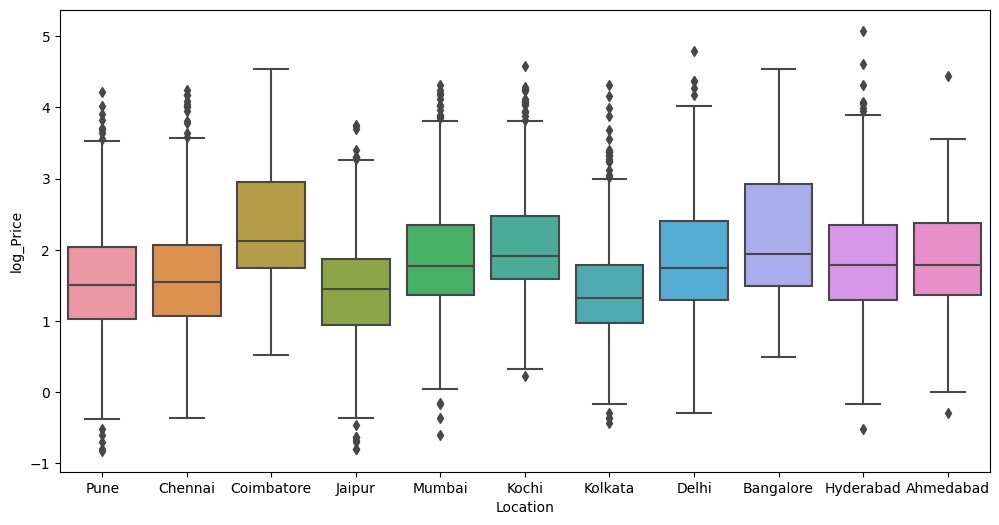

In [96]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Location"],y=df["log_Price"])
plt.show()

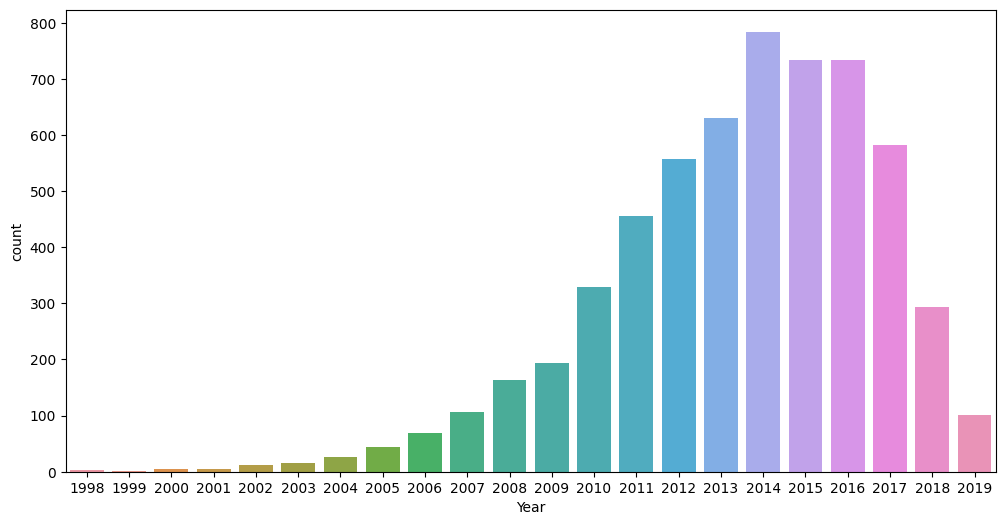

In [97]:
tmp_df = df["Year"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

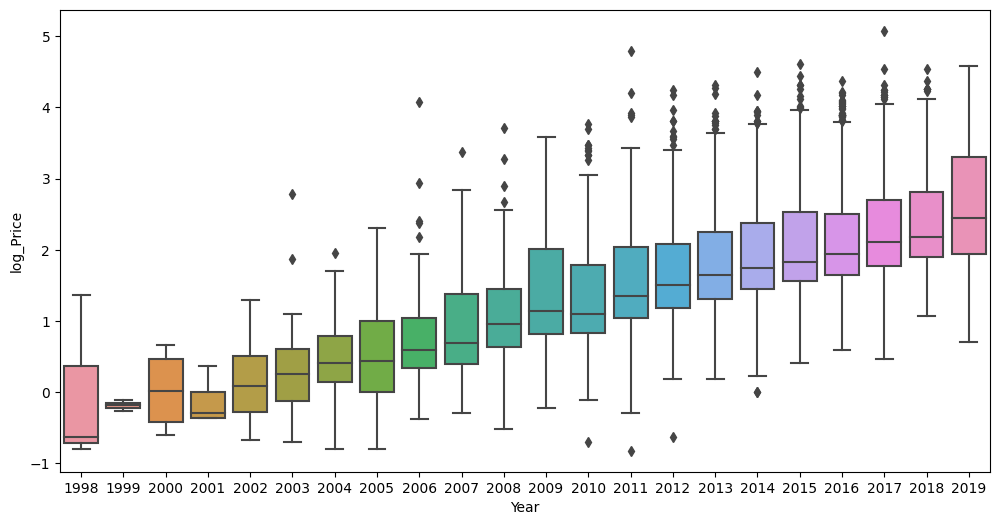

In [98]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Year"],y=df["log_Price"])
plt.show()

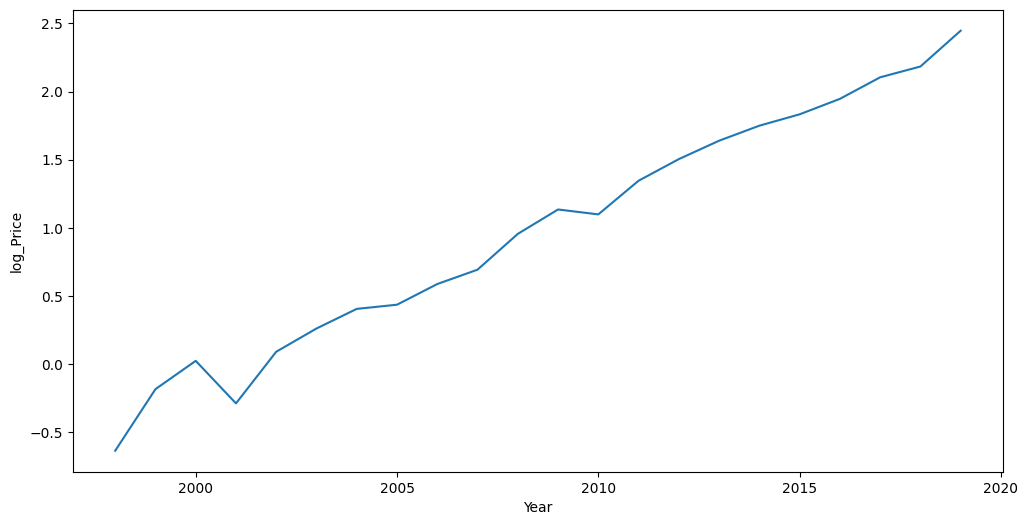

In [99]:
tmp_df = df.groupby("Year").agg({"log_Price":"median"})
plt.figure(figsize=(12,6))
sns.lineplot(x=tmp_df.index,y=tmp_df["log_Price"])
plt.show()

## log_Price and Year have a nearly linear relationship

In [100]:
df["pre_year"] = 2019 - df["Year"]

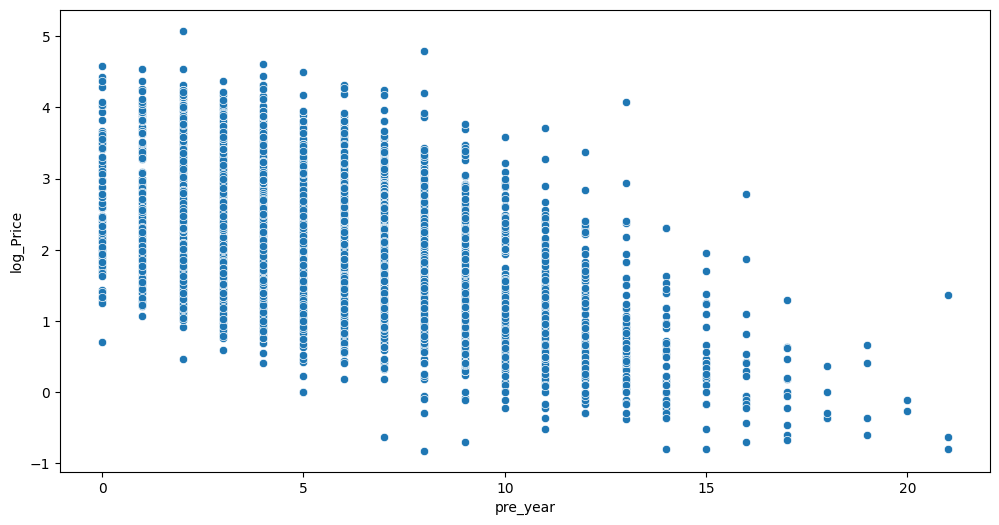

In [101]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["pre_year"],y=df["log_Price"])
plt.show()

<Axes: xlabel='log_Kilometers_Driven', ylabel='Count'>

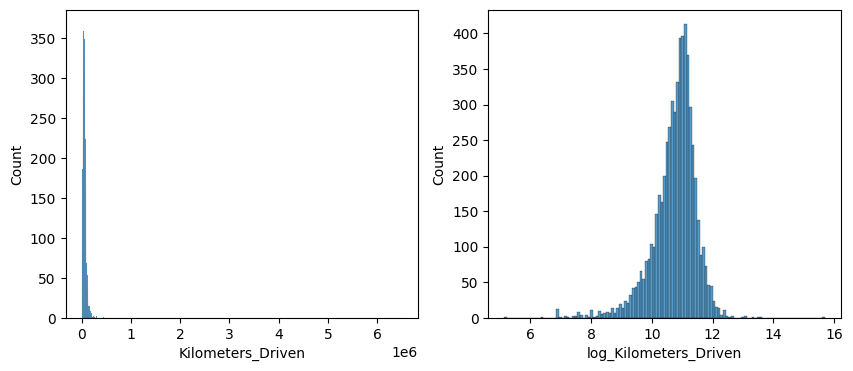

In [102]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(df["Kilometers_Driven"])

plt.subplot(122)
df["log_Kilometers_Driven"] = np.log(df["Kilometers_Driven"])
sns.histplot(df["log_Kilometers_Driven"])

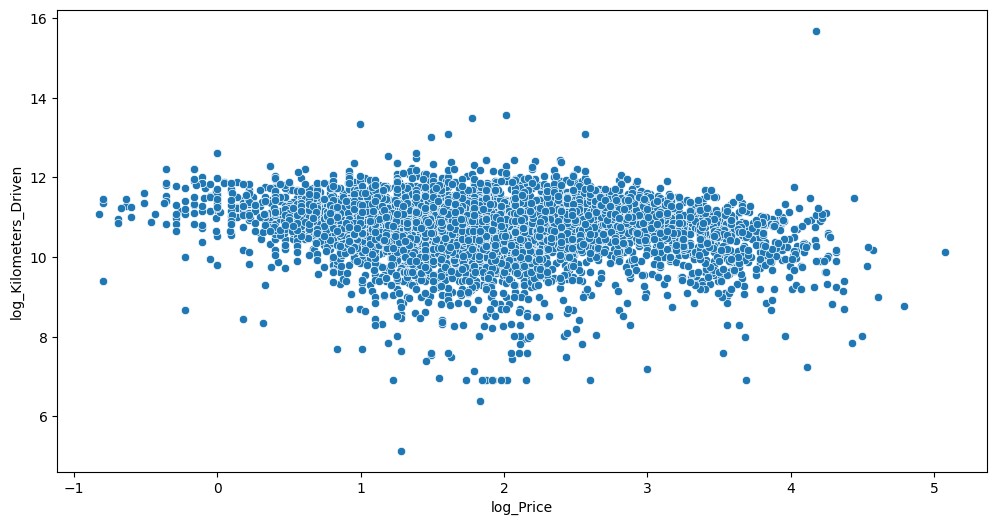

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["log_Price"],y=df["log_Kilometers_Driven"])
plt.show()

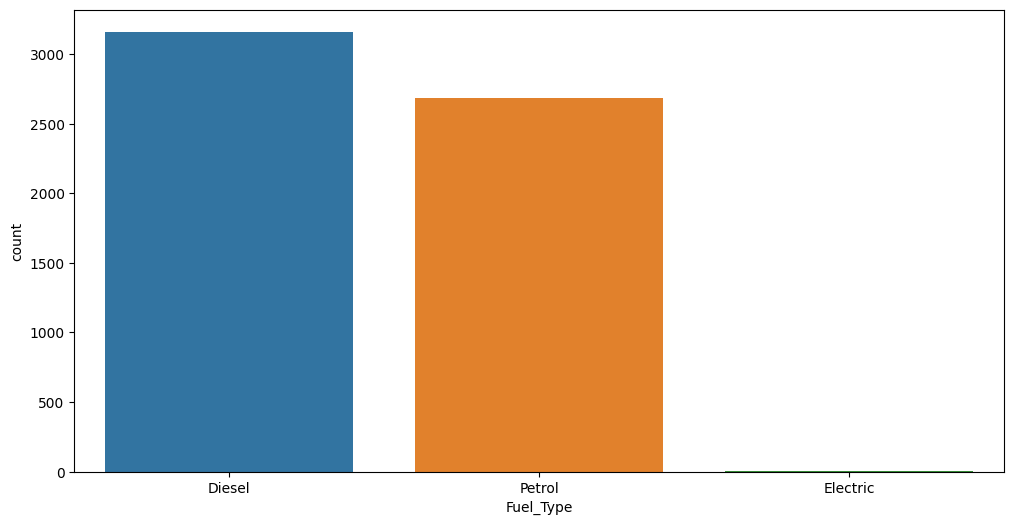

In [104]:
tmp_df = df["Fuel_Type"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

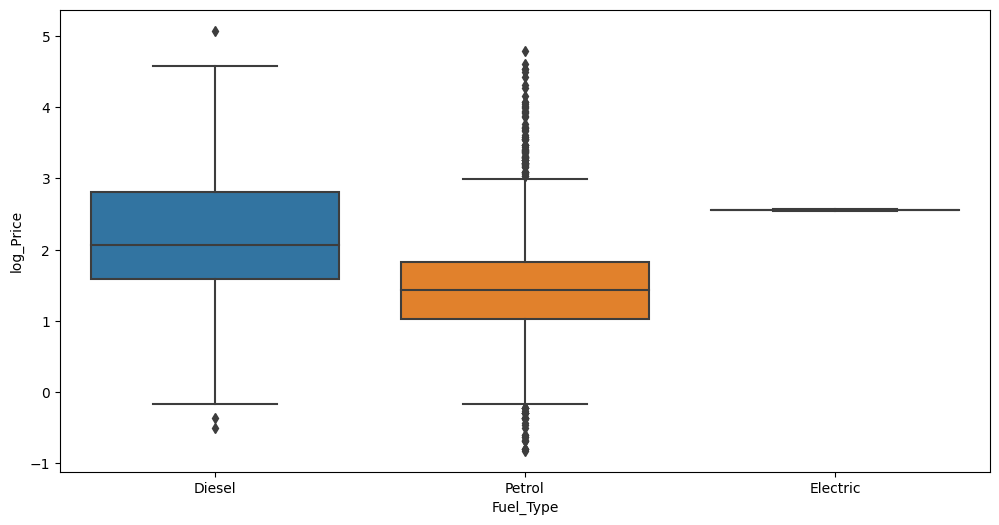

In [105]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Fuel_Type"],y=df["log_Price"])
plt.show()

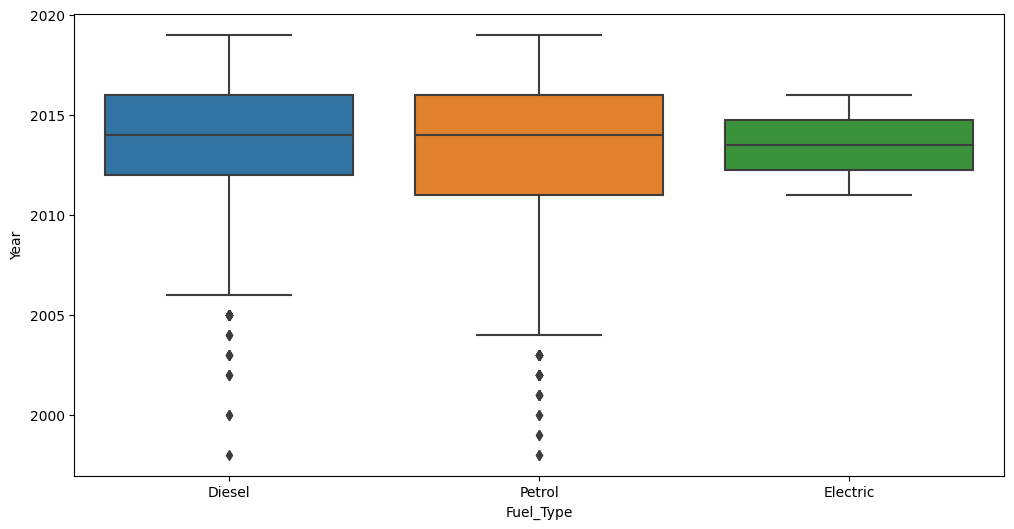

In [106]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Fuel_Type"],y=df["Year"])
plt.show()

## Recently manufactured electric cars are not sold...
## Are they selling outdated electric cars?

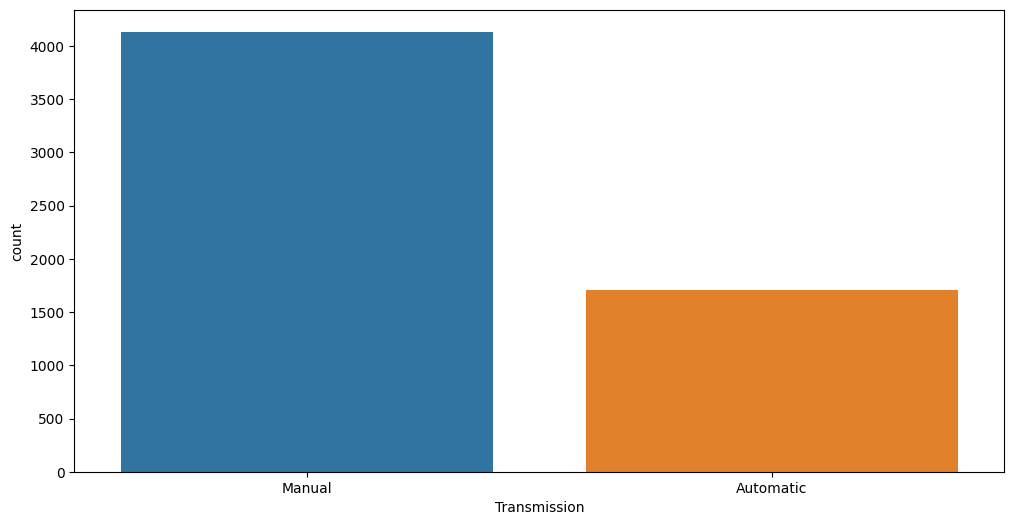

In [107]:
tmp_df = df["Transmission"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

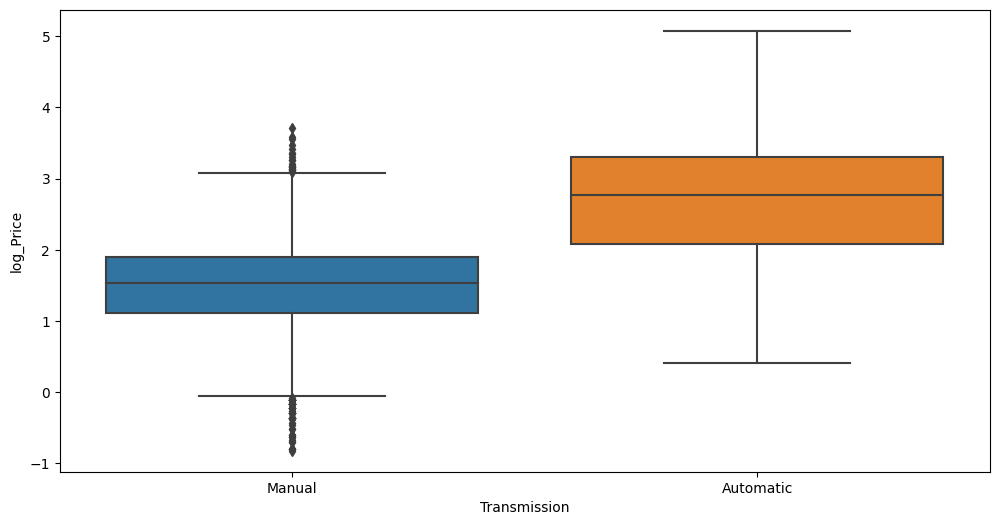

In [108]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Transmission"],y=df["log_Price"])
plt.show()

## There seems to be a big difference in transmission.
## I wonder if it's a matter of demand from recent buyers.
## It seems to have something to do with the percentage of people with automatic-only licenses.

In [109]:
pd.crosstab(df["Transmission"],df["Location"],normalize=True)

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
Transmission,,,,,,,,,,,
Automatic,0.009920,0.024628,0.020523,0.042244,0.029246,0.032837,0.008893,0.035061,0.013682,0.051308,0.024457
Manual,0.027364,0.035574,0.060886,0.065675,0.063109,0.088592,0.060031,0.074397,0.076107,0.079015,0.076449


## It seems that the difference in location is due to the large difference in transmission.

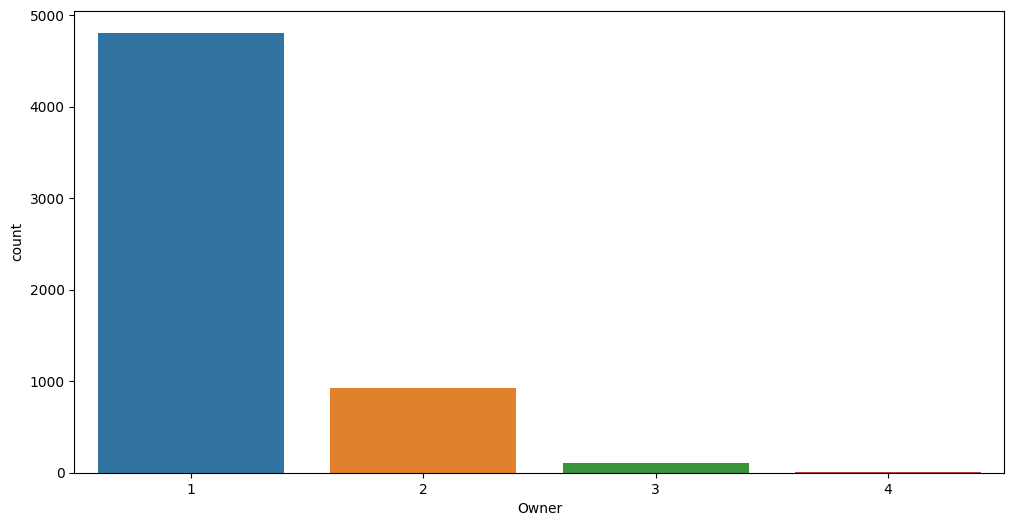

In [110]:
df["Owner"] = df["Owner_Type"].map({'First':1, 'Second':2, 'Fourth & Above':4, 'Third':3})
tmp_df = df["Owner"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

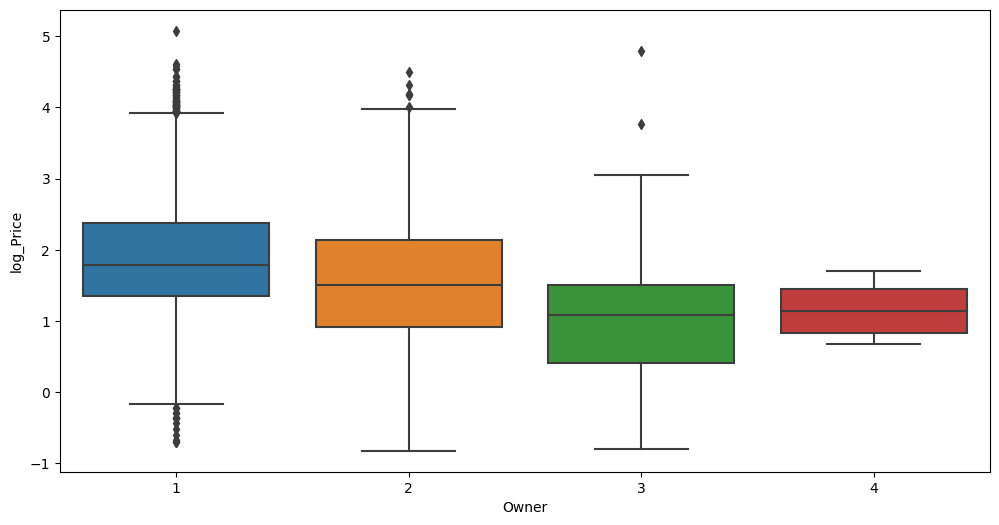

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Owner"],y=df["log_Price"])
plt.show()

## Why does it become more expensive when Owner is 4 or more?

In [112]:
df[df["Owner"]==4]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,log_Price,pre_year,log_Kilometers_Driven,Owner
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,4.00,1.386294,12,12.476100,4
885,Maruti Grand Vitara AT,Chennai,2008,77000,Petrol,Automatic,Fourth & Above,9.7 kmpl,1995 CC,163.5 bhp,5.0,NaN,5.50,1.704748,11,11.251561,4
1081,Hyundai i20 1.2 Sportz Option,Bangalore,2010,61000,Petrol,Manual,Fourth & Above,17.0 kmpl,1197 CC,80 bhp,5.0,NaN,3.25,1.178655,9,11.018629,4
1699,Ford Endeavour 4x2 XLT Limited Edition,Pune,2007,90000,Diesel,Manual,Fourth & Above,10.9 kmpl,2499 CC,143 bhp,7.0,NaN,3.00,1.098612,12,11.407565,4
2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2005,240000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,5.10,1.629241,14,12.388394,4
3368,Maruti Swift Ldi BSIII,Pune,2009,80000,Diesel,Manual,Fourth & Above,17.8 kmpl,1248 CC,75 bhp,5.0,NaN,2.15,0.765468,10,11.289782,4
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1 kmpl,NaN,NaN,NaN,NaN,2.35,0.854415,13,11.736069,4
4148,Ford Ikon 1.3 Flair,Coimbatore,2008,59833,Petrol,Manual,Fourth & Above,13.8 kmpl,1299 CC,70 bhp,5.0,NaN,1.97,0.678034,11,10.999313,4


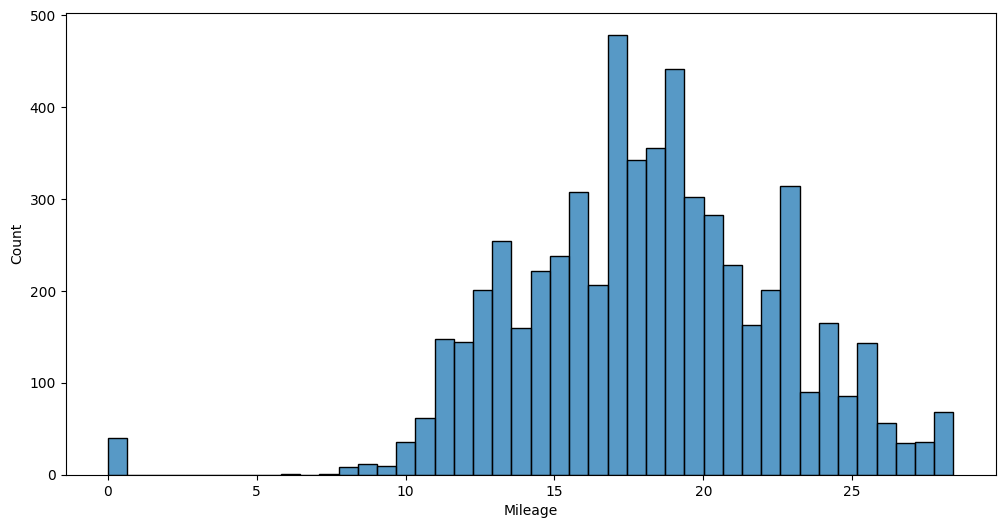

In [113]:
try:
    df['Mileage'] = df['Mileage'].str.extract('(.+?)\s+kmpl')[0].astype("float")
except:
    pass
plt.figure(figsize=(12,6))
sns.histplot(df["Mileage"])
plt.show()

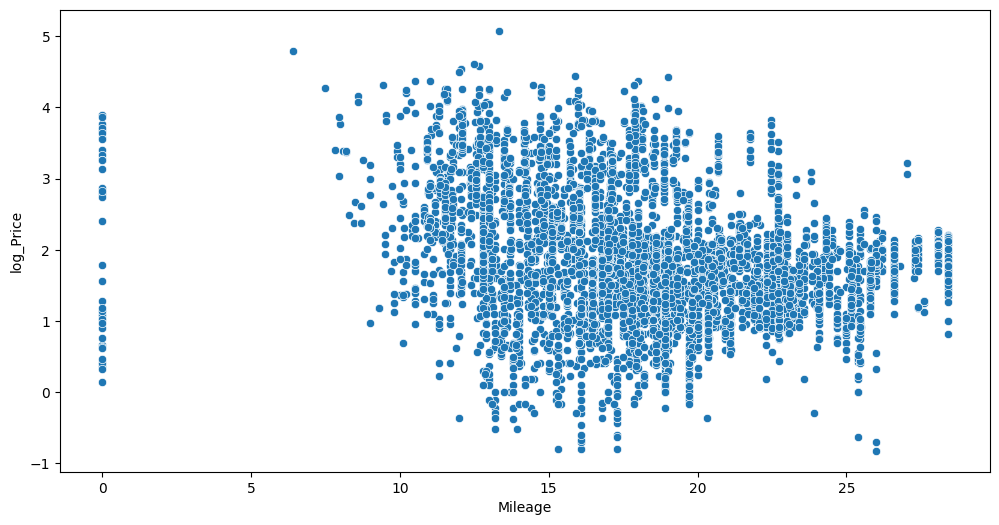

In [114]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["Mileage"],y=df["log_Price"])
plt.show()

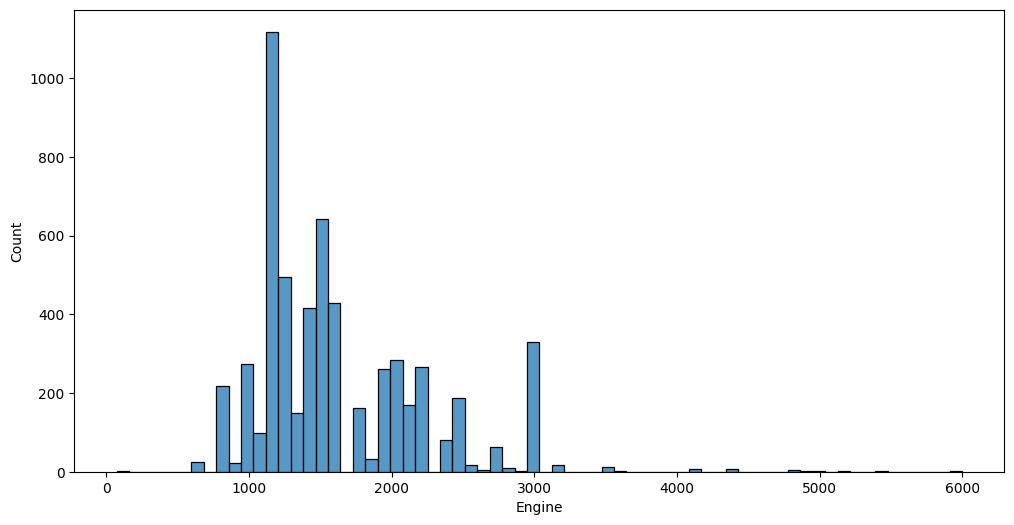

In [115]:
try:
    df['Engine'] = df['Engine'].str.extract('(.+?)\s+CC')[0].astype("float")
except:
    pass
plt.figure(figsize=(12,6))
sns.histplot(df["Engine"])
plt.show()

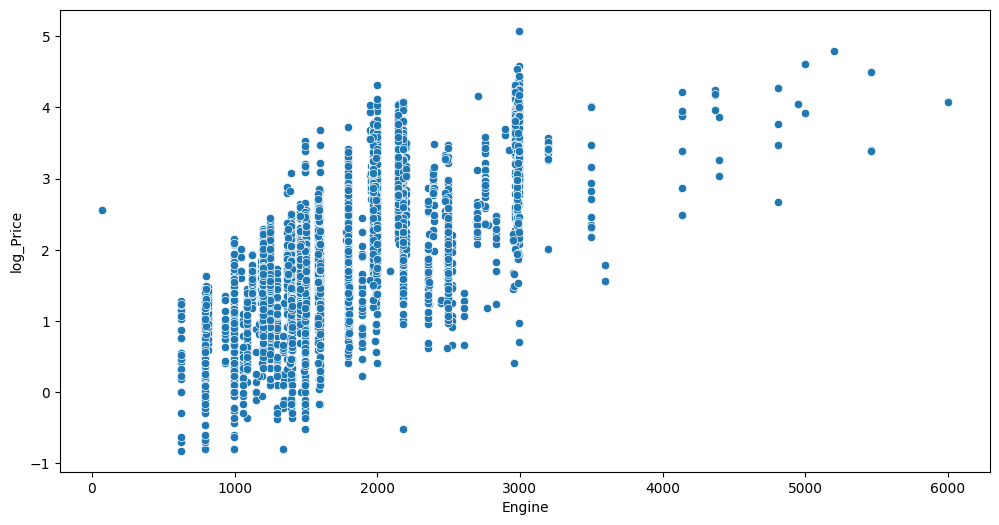

In [116]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["Engine"],y=df["log_Price"])
plt.show()

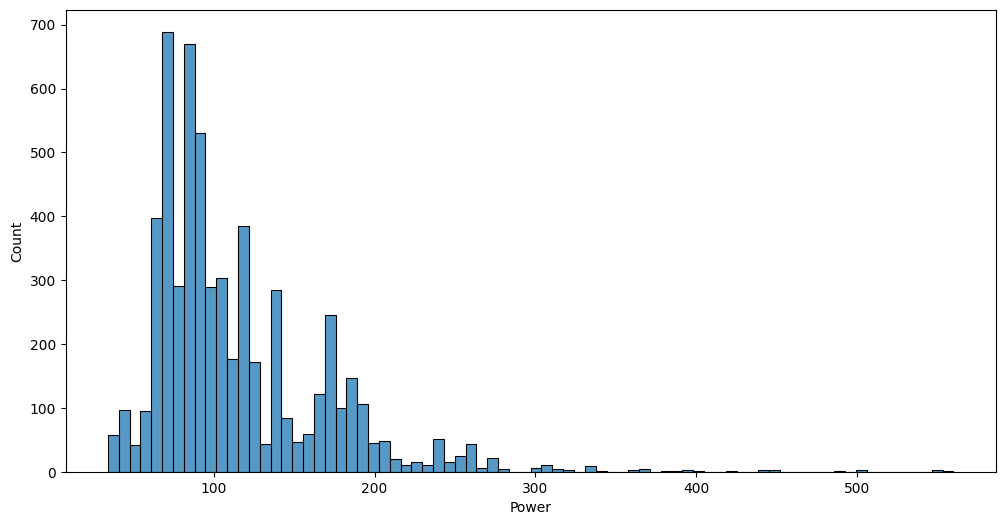

In [117]:
try:
    df['Power'] = df['Power'].str.extract('(.+?)\s+bhp')[0].astype("float")
except:
    pass
plt.figure(figsize=(12,6))
sns.histplot(df["Power"])
plt.show()

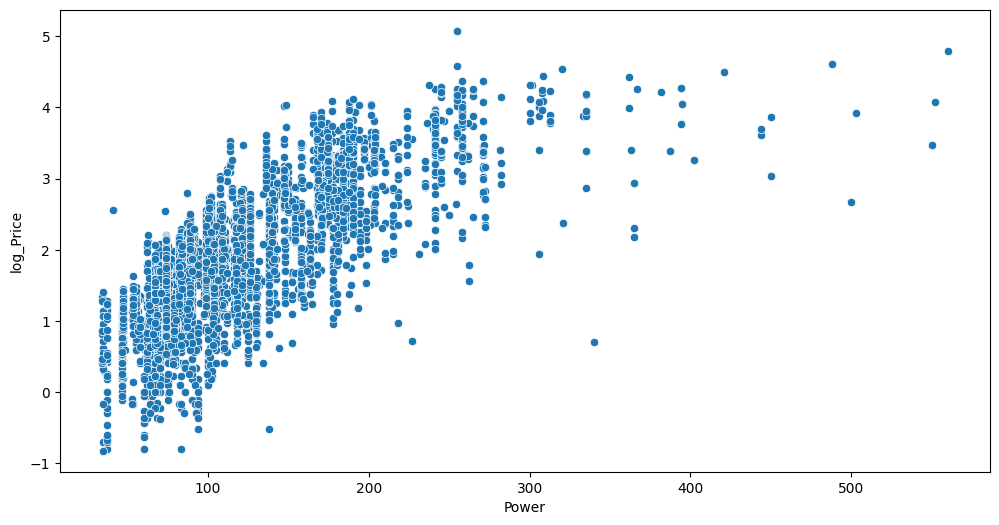

In [119]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["Power"],y=df["log_Price"])
plt.show()

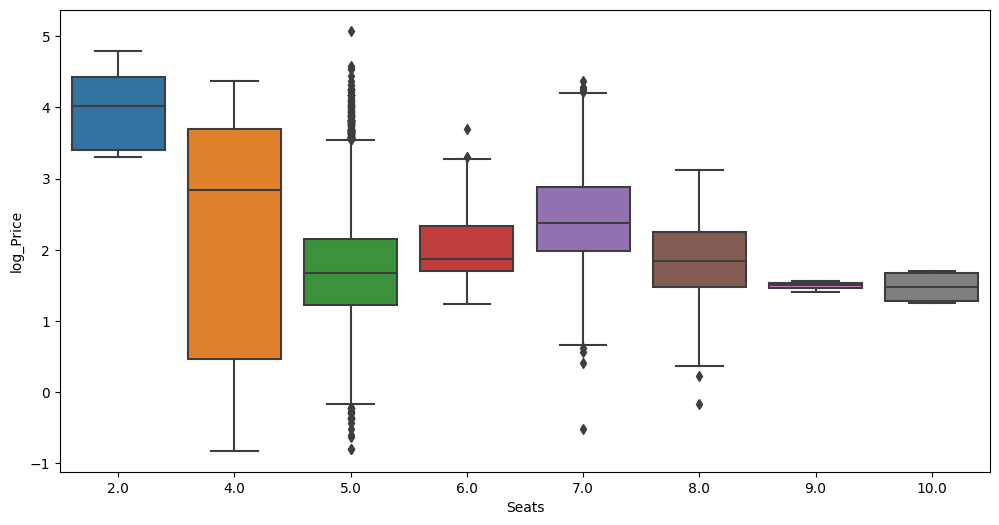

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Seats"],y=df["log_Price"])
plt.show()

## Do many two-seaters have large horsepower like sports cars?
## Why is the 7-seater version more expensive than the one before and after it (5-9 seats)?

In [124]:
print(df[df["Seats"]==2][["Engine","Power"]].mean())
print()
print(df[df["Seats"]!=2][["Engine","Power"]].mean())

Engine    3595.846154
Power      345.010769
dtype: float64

Engine    1627.148327
Power      113.284741
dtype: float64


## The hypothesis about two-seaters is probably correct.

# Thank you for visiting my Notebook.
# I'm look forward to your high evaluation.
# If you have any suggestions for improvement, please feel free to comment